In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
yields = pd.read_parquet("C:/Users/ZhipuCUI/Dropbox/PC/Documents/GitHub/HCYPPD/data/raw/franceagrimer-rdts-surfs-multicrops.parquet")

In [3]:
yields

n_dep             dep  surf_2017  surf_2018  surf_2019  surf_2020  \
0      75           PARIS        0.0        0.0        0.0        0.0   
1      77  SEINE-ET-MARNE    24855.0    26685.0    37970.0    34730.0   
2      78        YVELINES     4480.0     3890.0     6015.0     6770.0   
3      91         ESSONNE    10600.0    11485.0    15950.0    13635.0   
4      92  HAUTS DE SEINE        0.0        0.0        0.0        0.0   
..    ...             ...        ...        ...        ...        ...   
109   971      GUADELOUPE        0.0        0.0        0.0        0.0   
110   972      MARTINIQUE        0.0        0.0        0.0        0.0   
111   973          GUYANE        0.0        0.0        0.0        0.0   
112   974         RÉUNION        0.0        0.0        0.0        0.0   
113   976         MAYOTTE        0.0        0.0        0.0        0.0   

     surf_2021  surf_2022  rdt_2017  rdt_2018  rdt_2019  rdt_2020  rdt_2021  \
0          0.0        0.0       0.0       0.0       0.0       0.0       0.0   
1      24805.0    28775.0      72.0      68.0      79.0      53.0      70.0   
2       4110.0     4275.0      65.0      62.0      78.0      51.0      67.0   
3       9440.0    10950.0      68.0      69.0      78.0      54.0      73.0   
4          0.0        0.0       0.0       0.0       0.0       0.0       0.0   
..         ...        ...       ...       ...       ...       ...       ...   
109        0.0        0.0       0.0       0.0       0.0       0.0       0.0   
110        0.0        0.0       0.0       0.0       0.0       0.0       0.0   
111        0.0        0.0       0.0       0.0       0.0       0.0       0.0   
112        0.0        0.0       0.0       0.0       0.0       0.0       0.0   
113        0.0        0.0       0.0       0.0       0.0       0.0       0.0   

     rdt_2022  prod_2017  prod_2018  prod_2019  prod_2020  prod_2021 crop  
0         0.0        0.0        0.0        0.0        0.0        0.0   OP  
1         0.0   178956.0   181458.0   299963.0   184069.0   173635.0   OP  
2         0.0    29120.0    24118.0    46917.0    34527.0    27537.0   OP  
3         0.0    72080.0    79247.0   124410.0    73629.0    68912.0   OP  
4         0.0        0.0        0.0        0.0        0.0        0.0   OP  
..        ...        ...        ...        ...        ...        ...  ...  
109       0.0        0.0        0.0        0.0        0.0        0.0   MA  
110       0.0        0.0        0.0        0.0        0.0        0.0   MA  
111       0.0        0.0        0.0        0.0        0.0        0.0   MA  
112       0.0        0.0        0.0        0.0        0.0        0.0   MA  
113       0.0        0.0        0.0        0.0        0.0        0.0   MA  

[1026 rows x 20 columns]

In [4]:
yields = yields.melt(id_vars=['n_dep', 'dep', 'crop'])

In [5]:
yields

n_dep             dep crop   variable    value
0        75           PARIS   OP  surf_2017      0.0
1        77  SEINE-ET-MARNE   OP  surf_2017  24855.0
2        78        YVELINES   OP  surf_2017   4480.0
3        91         ESSONNE   OP  surf_2017  10600.0
4        92  HAUTS DE SEINE   OP  surf_2017      0.0
...     ...             ...  ...        ...      ...
17437   971      GUADELOUPE   MA  prod_2021      0.0
17438   972      MARTINIQUE   MA  prod_2021      0.0
17439   973          GUYANE   MA  prod_2021      0.0
17440   974         RÉUNION   MA  prod_2021      0.0
17441   976         MAYOTTE   MA  prod_2021      0.0

[17442 rows x 5 columns]

In [6]:
yields = yields[yields['value'] > 0.]

In [7]:
yields['year'] = yields['variable'].apply(lambda x: int(x.split('_')[-1]))

C:\Users\ZhipuCUI\AppData\Local\Temp/ipykernel_23712/3443773115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields['year'] = yields['variable'].apply(lambda x: int(x.split('_')[-1]))


In [8]:
yields['variable'] = yields['variable'].apply(lambda x: x.split('_')[0])

C:\Users\ZhipuCUI\AppData\Local\Temp/ipykernel_23712/225941654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields['variable'] = yields['variable'].apply(lambda x: x.split('_')[0])


In [9]:
yields

n_dep             dep crop variable    value  year
1        77  SEINE-ET-MARNE   OP     surf  24855.0  2017
2        78        YVELINES   OP     surf   4480.0  2017
3        91         ESSONNE   OP     surf  10600.0  2017
5        93  SEINE ST DENIS   OP     surf     60.0  2017
6        94    VAL DE MARNE   OP     surf     80.0  2017
...     ...             ...  ...      ...      ...   ...
17432    84        VAUCLUSE   MA     prod   4052.0  2021
17433    99            PACA   MA     prod  23974.0  2021
17434    2A           CORSE   MA     prod    240.0  2021
17435    2B           CORSE   MA     prod   4535.0  2021
17436    99           CORSE   MA     prod   4775.0  2021

[13462 rows x 6 columns]

In [10]:
yields = yields[yields['variable'] == 'rdt'].drop(columns='variable')

In [11]:
yields

n_dep             dep crop  value  year
6157     77  SEINE-ET-MARNE   OP   72.0  2017
6158     78        YVELINES   OP   65.0  2017
6159     91         ESSONNE   OP   68.0  2017
6161     93  SEINE ST DENIS   OP   69.0  2017
6162     94    VAL DE MARNE   OP   68.0  2017
...     ...             ...  ...    ...   ...
11276    84        VAUCLUSE   MA   64.4  2021
11277    99            PACA   MA   75.4  2021
11278    2A           CORSE   MA  120.0  2021
11279    2B           CORSE   MA  120.0  2021
11280    99           CORSE   MA  120.0  2021

[4204 rows x 5 columns]

<AxesSubplot:xlabel='crop', ylabel='value'>

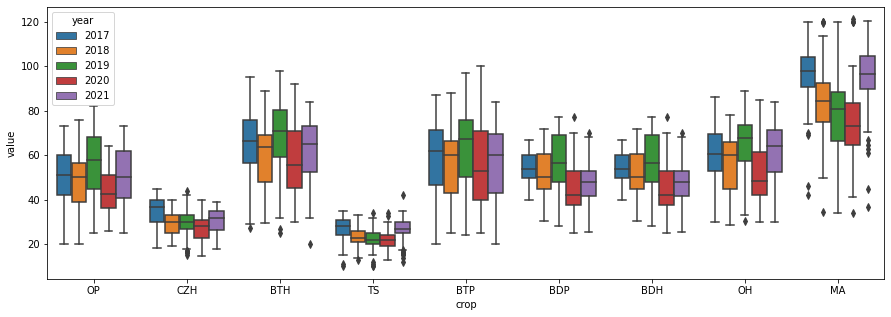

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=yields, x='crop', hue='year', y='value', ax=ax)